In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
df = pd.read_csv('hepatitis.data', usecols=[0, 1, 8, 9, 14, 15, 16, 17, 18],
                 names=['CLASS', 'AGE', 'LIVER BIG', 'LIVER FIRM', 'BILIRUBIN',
                        'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME'])

In [3]:
df = df.replace(to_replace='?', value=np.nan)

In [4]:
df = df.astype('float64')

In [5]:
df[['ALK PHOSPHATE', 'ALBUMIN', 'PROTIME']] = \
df[['ALK PHOSPHATE', 'ALBUMIN', 'PROTIME']].fillna(df[['ALK PHOSPHATE', 'ALBUMIN', 'PROTIME']].mean())

In [6]:
df.dropna(inplace=True)

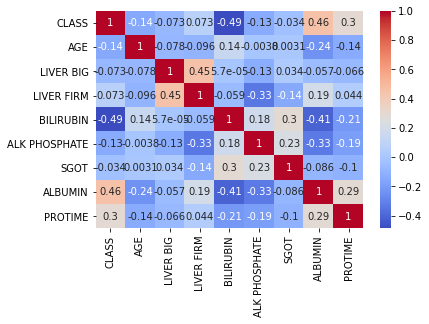

In [7]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, [1, 4, 5, 6, 7, 8]],
                                                    df[['CLASS']], test_size=0.2, random_state=42)

In [164]:
clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=2)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=2)}')
print(f'F1 Score: {f1_score(y_test, y_pred, pos_label=2)}')

Accuracy: 0.6428571428571429
Precision: 0.7
Recall: 0.7777777777777778
F1 Score: 0.7368421052631577


In [242]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=2)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=2)}')
print(f'F1 Score: {f1_score(y_test, y_pred, pos_label=2)}')

Accuracy: 0.5714285714285714
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


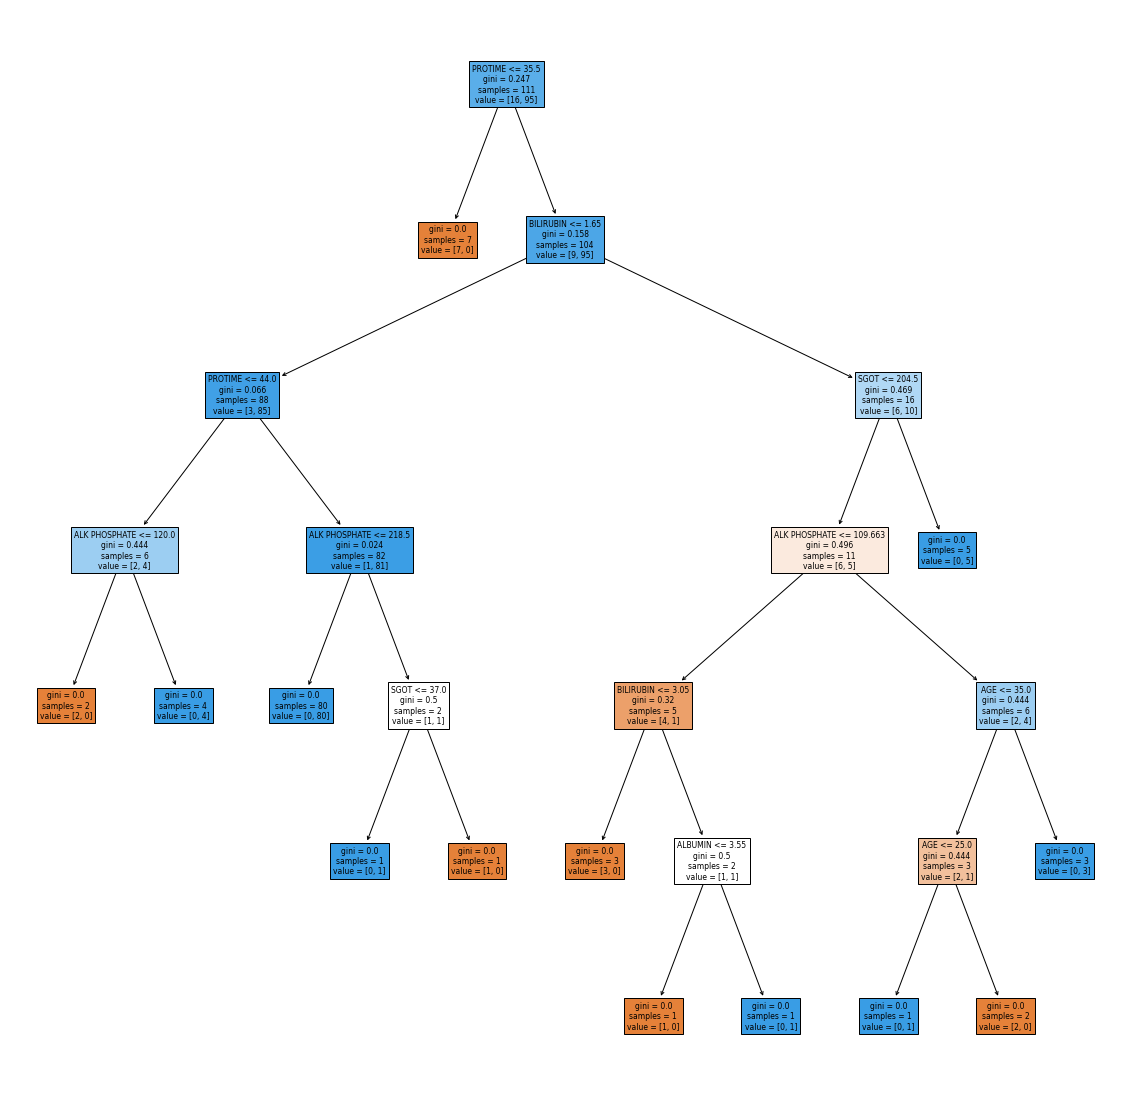

In [255]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 20))
# tree.plot_tree(dt, filled=True, feature_names=['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']);
# plt.savefig('tree.png')

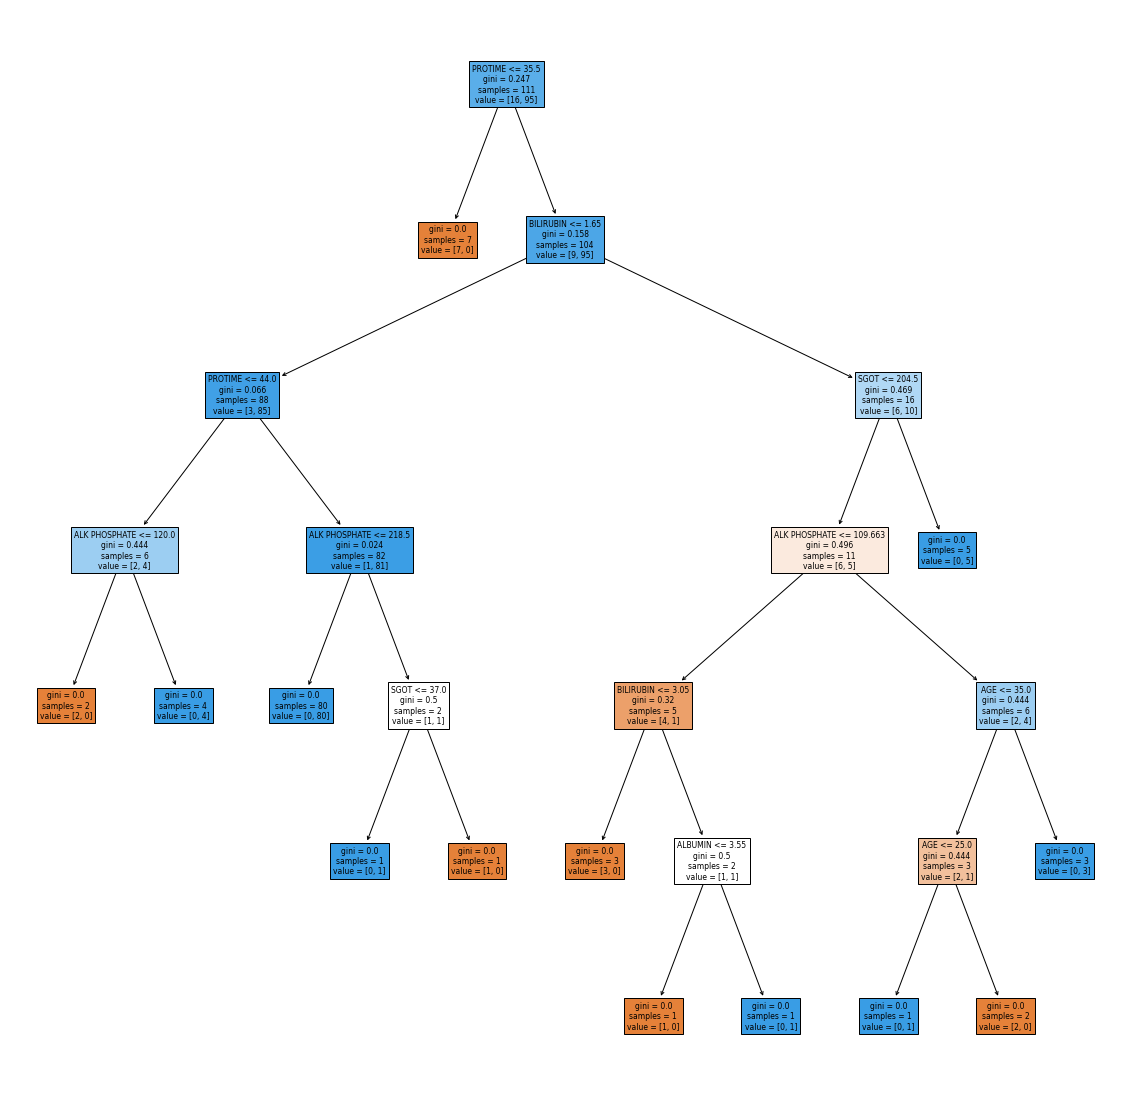

In [255]:
tree.plot_tree(dt, filled=True, feature_names=['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']);

In [234]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train.values.ravel())
y_pred = ada.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=2)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=2)}')
print(f'F1 Score: {f1_score(y_test, y_pred, pos_label=2)}')

Accuracy: 0.6428571428571429
Precision: 0.6818181818181818
Recall: 0.8333333333333334
F1 Score: 0.7499999999999999


In [225]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())
y_pred = forest.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=2)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=2)}')
print(f'F1 Score: {f1_score(y_test, y_pred, pos_label=2)}')

Accuracy: 0.6428571428571429
Precision: 0.7
Recall: 0.7777777777777778
F1 Score: 0.7368421052631577
